In [1]:
import numpy as np
import pandas as pd
bc=pd.read_csv('BC.csv')

/tmp/ipykernel_33/2436019643.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
bc.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [3]:

bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [4]:
bc.shape

(286, 10)

In [5]:
bc['node-caps'] = bc['node-caps'].replace('?', bc['node-caps'].mode()[0])
bc['breast-quad'] = bc['breast-quad'].replace('?', bc['breast-quad'].mode()[0])

In [6]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [7]:
bc['class'].unique()

array(['no-recurrence-events', 'recurrence-events'], dtype=object)

In [8]:
bc['age'].unique()

array(['30-39', '40-49', '60-69', '50-59', '70-79', '20-29'], dtype=object)

In [9]:
bc['menopause'].unique()

array(['premeno', 'ge40', 'lt40'], dtype=object)

In [10]:
bc['tumor-size'].unique()

array(['30-34', '20-24', '15-19', '0-4', '25-29', '50-54', '10-14',
       '40-44', '35-39', '5-9', '45-49'], dtype=object)

In [11]:
bc['inv-nodes'].unique()

array(['0-2', '6-8', '9-11', '3-5', '15-17', '12-14', '24-26'],
      dtype=object)

In [12]:
bc['node-caps'].unique()

array(['no', 'yes'], dtype=object)

In [13]:
bc['breast'].unique()

array(['left', 'right'], dtype=object)

In [14]:
bc['breast-quad'].unique()

array(['left_low', 'right_up', 'left_up', 'right_low', 'central'],
      dtype=object)

In [15]:
bc['irradiat'].unique()

array(['no', 'yes'], dtype=object)

In [17]:
bc['class'] = bc['class'].astype("category")
bc['menopause'] = bc['menopause'].astype("category")
bc['node-caps'] = bc['node-caps'].astype("category")
bc['breast'] = bc['breast'].astype("category")
bc['breast-quad'] = bc['breast-quad'].astype("category")
bc['irradiat'] = bc['irradiat'].astype("category")
bc['age'] = bc['age'].astype("category")
bc['tumor-size'] = bc['tumor-size'].astype("category")
bc['inv-nodes'] = bc['inv-nodes'].astype("category")

Text(0.5, 0, 'Age')

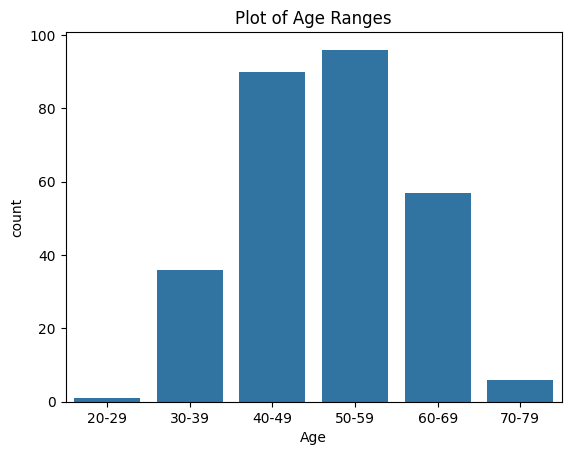

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=bc['age'])
plt.title("Plot of Age Ranges")
plt.xlabel("Age")

Text(0.5, 0, 'Menopause Status')

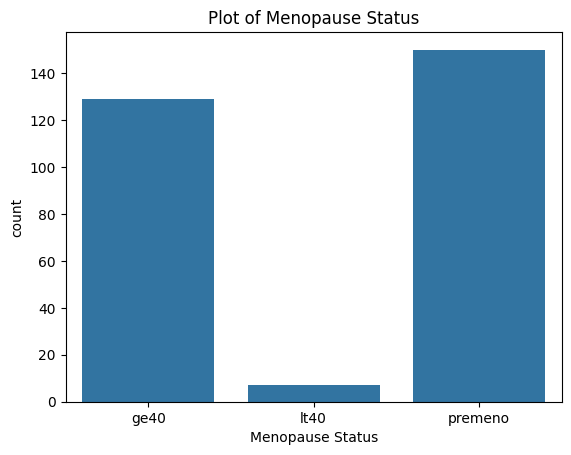

In [21]:
sns.countplot(x=bc['menopause'])
plt.title("Plot of Menopause Status")
plt.xlabel("Menopause Status")

Text(0.5, 0, 'class')

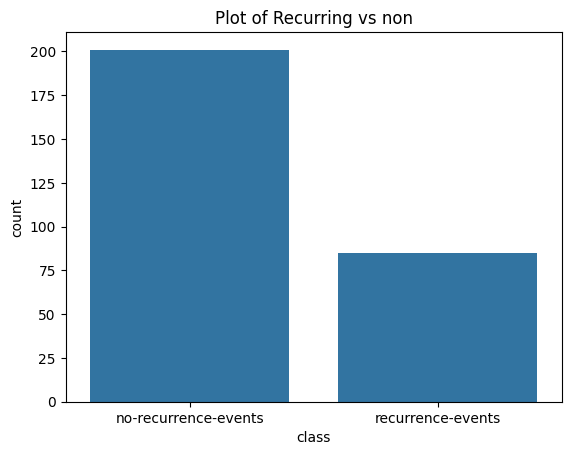

In [23]:
sns.countplot(x=bc['class'])
plt.title("Plot of Recurring vs non")
plt.xlabel("class")

Text(0.5, 0, 'Irradiation Status')

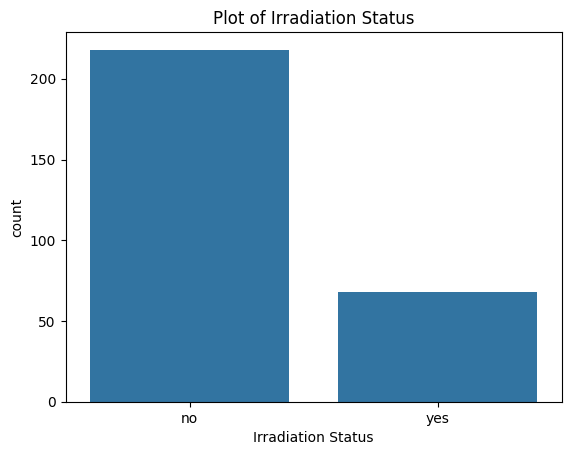

In [24]:
sns.countplot(x=bc['irradiat'])
plt.title("Plot of Irradiation Status")
plt.xlabel("Irradiation Status")

([<matplotlib.axis.XTick at 0x7f31d921fc90>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

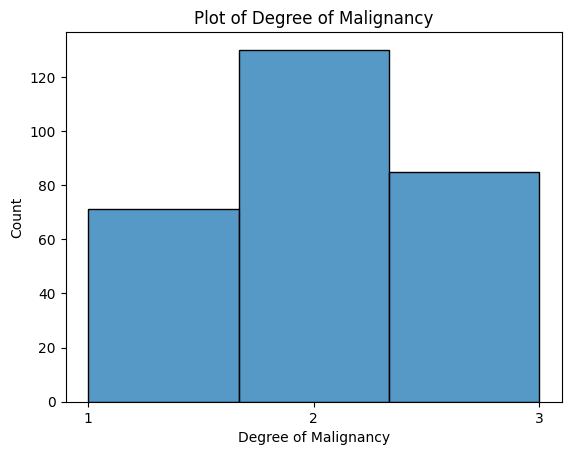

In [27]:
sns.histplot(bc['deg-malig'], bins=3, kde=False)
plt.title("Plot of Degree of Malignancy")
plt.xlabel("Degree of Malignancy")
plt.xticks([1, 2, 3])

In [28]:
bc = pd.get_dummies(bc, columns=["class", 'menopause', 'node-caps','breast','breast-quad','irradiat','age','tumor-size','inv-nodes'], drop_first=True)
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   deg-malig                286 non-null    int64
 1   class_recurrence-events  286 non-null    bool 
 2   menopause_lt40           286 non-null    bool 
 3   menopause_premeno        286 non-null    bool 
 4   node-caps_yes            286 non-null    bool 
 5   breast_right             286 non-null    bool 
 6   breast-quad_left_low     286 non-null    bool 
 7   breast-quad_left_up      286 non-null    bool 
 8   breast-quad_right_low    286 non-null    bool 
 9   breast-quad_right_up     286 non-null    bool 
 10  irradiat_yes             286 non-null    bool 
 11  age_30-39                286 non-null    bool 
 12  age_40-49                286 non-null    bool 
 13  age_50-59                286 non-null    bool 
 14  age_60-69                286 non-null    bool 
 15  age_70

In [42]:
from sklearn.model_selection import train_test_split

X = bc.drop('class_recurrence-events', axis=1)
y = bc['class_recurrence-events']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [43]:
X_train.shape

(228, 31)

In [44]:
X_test.shape

(58, 31)

## Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
from sklearn.metrics import classification_report
print(f"Performance on TEST\n*******************\n{classification_report(y_test, model_dt.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, model_dt.predict(X_train))}")


Performance on TEST
*******************
              precision    recall  f1-score   support

       False       0.74      0.72      0.73        40
        True       0.42      0.44      0.43        18

    accuracy                           0.64        58
   macro avg       0.58      0.58      0.58        58
weighted avg       0.64      0.64      0.64        58

Performance on TRAIN
********************
              precision    recall  f1-score   support

       False       0.98      0.99      0.99       161
        True       0.98      0.96      0.97        67

    accuracy                           0.98       228
   macro avg       0.98      0.97      0.98       228
weighted avg       0.98      0.98      0.98       228



## Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# fit the LG model -- random_state is used to shuffle the data; max_iter is max # of iterations for solver to converge (default is 100)
model_lr = LogisticRegression(random_state=1, max_iter=1000).fit(X_train, y_train)
# print the report
print(f"Performance on TEST\n*******************\n{classification_report(y_test, model_lr.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(y_train, model_lr.predict(X_train))}")

Performance on TEST
*******************
              precision    recall  f1-score   support

       False       0.75      0.90      0.82        40
        True       0.60      0.33      0.43        18

    accuracy                           0.72        58
   macro avg       0.68      0.62      0.62        58
weighted avg       0.70      0.72      0.70        58

Performance on TRAIN
********************
              precision    recall  f1-score   support

       False       0.78      0.91      0.84       161
        True       0.64      0.40      0.50        67

    accuracy                           0.76       228
   macro avg       0.71      0.65      0.67       228
weighted avg       0.74      0.76      0.74       228



## Naive Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB

# instantiate gaussian NB model, fit, and predict
gnb = GaussianNB()
y_pred_gnb = gnb.fit(X_train, y_train).predict(X_test)

# print classification report
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

       False       0.78      0.17      0.29        40
        True       0.33      0.89      0.48        18

    accuracy                           0.40        58
   macro avg       0.55      0.53      0.38        58
weighted avg       0.64      0.40      0.35        58

